<a href="https://colab.research.google.com/github/felipecortesl-dotcom/Tareas/blob/main/TAREA8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Burden 5.2.12 – Método de Euler, estabilidad y error 

Problema de valor inicial:
\[
y'(t) = -10\,y, \quad y(0)=1,\quad 0\le t \le 2, \qquad y(t)=e^{-10t}.
\]

Objetivos del notebook:
1. Implementar **Euler explícito**.
2. Ilustrar **estabilidad** para \(h=0.05\) (estable), \(h=0.1\) (frontera), \(h=0.12\) (inestable).
3. Medir el **error** \(\|y_{\text{num}}-y_{\text{exacta}}\|_\infty\).


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


## Implementación de Euler

In [ ]:
from dataclasses import dataclass

@dataclass
class EulerResult:
    t: np.ndarray
    y: np.ndarray
    h: float

def euler_explicit(f, y0: float, t0: float, tf: float, h: float) -> EulerResult:
    """Euler explícito en [t0, tf] con paso h."""
    n = int(np.ceil((tf - t0)/h))
    t = t0 + np.arange(n + 1) * h
    t[-1] = tf  # forzar exacto el extremo
    y = np.empty_like(t, dtype=float)
    y[0] = y0
    for k in range(n):
        hk = t[k+1] - t[k]       # el último paso puede ser menor para cerrar en tf
        y[k+1] = y[k] + hk * f(t[k], y[k])
    return EulerResult(t=t, y=y, h=h)

# Problema del enunciado
def f_linear(t, y):
    return -10.0 * y

def y_exact(t):
    return np.exp(-10.0 * t)

def max_error(y_num: np.ndarray, t: np.ndarray) -> float:
    return float(np.max(np.abs(y_num - y_exact(t))))


## Experimentos: h=0.05, h=0.1, h=0.12

In [ ]:
def run_case(h):
    res = euler_explicit(f_linear, y0=1.0, t0=0.0, tf=2.0, h=h)
    err = max_error(res.y, res.t)
    print(f"h = {h:>5}:  ||error||_inf = {err:.6e}  (y_N = {res.y[-1]:.6e})")
    return res

hs = [0.05, 0.1, 0.12]  # estable / frontera / inestable
results = [run_case(h) for h in hs]


h =  0.05:  ||error||_inf = 1.178794e-01  (y_N = 9.094947e-13)
h =   0.1:  ||error||_inf = 3.678794e-01  (y_N = 0.000000e+00)
h =  0.12:  ||error||_inf = 5.011942e-01  (y_N = 1.310720e-12)


## Gráfica de comparación

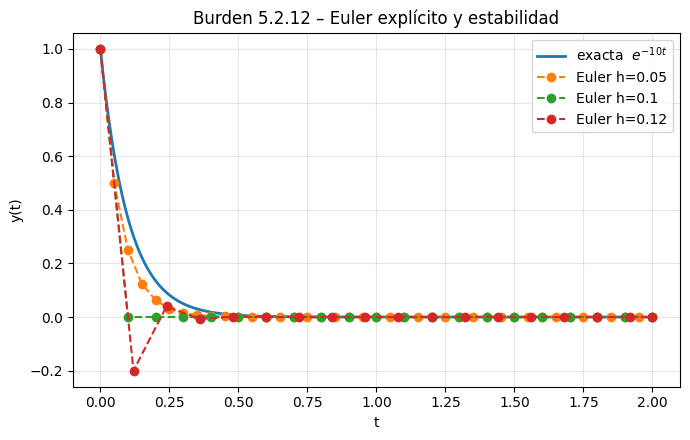

In [ ]:
tt = np.linspace(0, 2, 800)
yy = y_exact(tt)

plt.figure(figsize=(7, 4.5))
plt.plot(tt, yy, label=r"exacta  $e^{-10t}$", linewidth=2)
for r in results:
    plt.plot(r.t, r.y, marker='o', linestyle='--', label=f"Euler h={r.h}")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Burden 5.2.12 – Euler explícito y estabilidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



### Notas teóricas breves
- Fórmula de Euler: \(y_{n+1}=y_n+h f(t_n,y_n)\) ⇒ para \(y'=\lambda y\), **factor de amplificación** \(G=1+h\lambda\).
- **Estabilidad**: \(|G|<1\). Con \(\lambda=-10\):
  - \(h<0.1\): \(|1-10h|<1\) (estable).
  - \(h=0.1\): \(|1-10h|=0\) (frontera; solución numérica cae a 0 en el primer paso).
  - \(h>0.1\): \(|1-10h|>1\) (inestable).
- **Error local** de Euler: \(\\tau_n=\\tfrac{h^2}{2}y''(\\xi_n)\\) ⇒ \(O(h^2)\).
- **Error global**: \(O(h)\) cuando \(h\\to 0\). La patología con \(h=0.1\) se debe a **estabilidad**, no a orden.
